In [1]:
# 線形モデルによる重回帰分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# 読込
df = pd.read_csv("../sort_demo_shipment_result.csv", encoding="cp932")
df = df.iloc[:, [20, 40, 44, 47, 52]]
print(df)

#マスタデータ読み込み
df_master = pd.read_csv("../dummy_product_master.csv", encoding="cp932", header=None)
df_master = df_master.iloc[:, [1, 44, 68]]
print(df_master)

         20        40                                        44          47  \
0        四国  20221008  a3M1oMGrFWAS0ppjbZjjg2qwjgdNr33ab60whViI   Product29   
1        近畿  20221008  91ngS7moyuvsrXc4cLSSCToqj4oPXEfQGzJ75mrn   Product11   
2        四国  20221008  A0ox1wEXxEvj7ldCJM6Q8c4tABFCS21tkmhQ8FzZ   Product15   
3       北関東  20221008  uNdcG8SXzB3IJEdqhHp8HQbCkfQwhMR9dRjQPHtu   Product28   
4       南関東  20221008  9AQVe9lV4TEQNBijSro9Vkv0mUpr7mfRRatTMu5A    Product4   
5        近畿  20221008  PS7WYI54gBiybiolFnb1JAarBRan33qlLKSgULQp   Product14   
6       北関東  20221008  H1rqSTX6eqGZQv4LzjEbx2A8J6231TPthReT9K8i   Product12   
7        東京  20221008  4opACXBiS8d2HSlLRZJlwbLeWRMXNcncapvAGb1D    Product5   
8       北海道  20221008  91ngS7moyuvsrXc4cLSSCToqj4oPXEfQGzJ75mrn   Product11   
9        近畿  20221008  nhIkyPVRyCBo8prlytyqjgWDwfKBNuOr7AS5PdyQ    Product0   
10       東海  20221008  54obFqWd478JILltuGsALO4mGvwVDx01KEdbFnS6    Product7   
11       中国  20221008  nhIkyPVRyCBo8prlytyqjgWDwfKBN

In [2]:
# １日おきの各商品の出荷数をまとめる


# ユニークな商品の数をカウント
pcode = df["44"].unique() #実際は商品名に重複がある可能性があるので、商品コードで判別
pname = df["47"].unique()
print(type(pcode))
print(pname[0:5]) 
print(len(pname))

# 今日の日にち（string)
now = "20221009"

# 日付初期値
initdate = datetime.date(2018, 1, 1)
# 当日
nowdate = datetime.date(int(now[0:4]), int(now[4:6]), int(now[6:8]))
print(nowdate)
# 差日
difdate = nowdate - initdate

# 初回販売日と最終販売日を格納する配列
masterdate_data = np.zeros((len(pcode), 2))

for i in range(len(pcode)):
    idf = df[df["44"] == pcode[i]]
    idf = idf.loc[:, ["40", "52"]]
    
#     最初の出荷日
    min_date = str(idf["40"].min())
    min_date = datetime.date(int(min_date[0:4]), int(min_date[4:6]), int(min_date[6:8]))
    
#     最後の出荷日
    max_date = str(idf["40"].max())
    max_date = datetime.date(int(max_date[0:4]), int(max_date[4:6]), int(max_date[6:8]))
    
    masterdate_data[i] = np.array([min_date.strftime("%Y%m%d"), max_date.strftime("%Y%m%d")])

print(masterdate_data[0:6])

<class 'numpy.ndarray'>
[' Product29' ' Product11' ' Product15' ' Product28' ' Product4']
30
2022-10-09
[[20190104. 20221008.]
 [20210816. 20221008.]
 [20201007. 20221008.]
 [20190624. 20221008.]
 [20210423. 20221008.]
 [20201217. 20221008.]]


In [3]:
# 20221008時点で販売・出荷を継続している商品だけを抽出
oindex = np.where(masterdate_data.T[1] == 20221008) #データと商品コードを紐づけるインデックス
oindex = oindex[0]
print(oindex)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


In [4]:
# 出荷データ格納配列
data = np.zeros((len(oindex), difdate.days))

for i in range(len(oindex)):
    
#     販売初日
    min_date = datetime.date(int(str(masterdate_data[oindex[i]][0])[0:4]), int(str(masterdate_data[oindex[i]][0])[4:6]), int(str(masterdate_data[oindex[i]][0])[6:8]))
     
    #    販売総日にち
    sumday = nowdate - min_date   
    sumday = sumday.days
    
#     日付初期値と最初の出荷日の差日
    dday = min_date - initdate
    dday = dday.days
    
#     抽出
    idf = df[df["44"] == pcode[oindex[i]]]
    idf = idf.loc[:, ["40", "52"]]
    
    for j in range(sumday):
        
        idate = min_date + datetime.timedelta(days=j)
        idate = idate.strftime("%Y%m%d")
        
        idf_samedate = idf[idf["40"] == int(idate)]
        
        data[i][j+dday] = idf_samedate["52"].sum()   
    
print(data[0:5])

[[  0.   0.   0. ... 147. 145. 149.]
 [  0.   0.   0. ...  93. 101.  94.]
 [  0.   0.   0. ... 368. 375. 371.]
 [  0.   0.   0. ... 199. 194. 196.]
 [  0.   0.   0. ... 188. 194. 198.]]


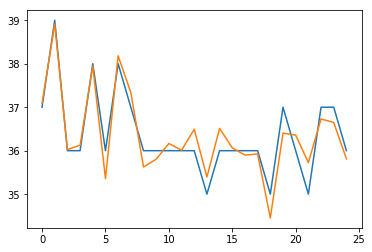

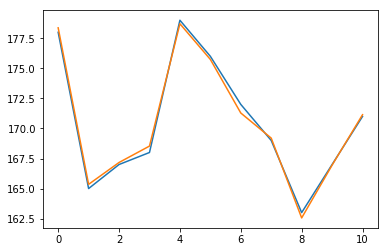

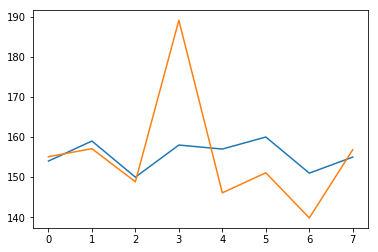

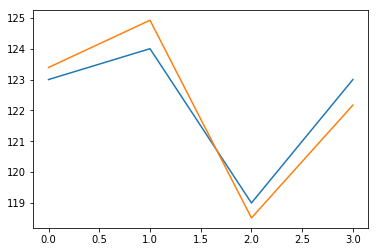

In [41]:

# product0,1,2,3,の商品情報が格納されているindexを取得
pindex = np.zeros(4)
pindex[0] = np.where(pname == " Product0")[0]
pindex[1] = np.where(pname == " Product1")[0]
pindex[2] = np.where(pname == " Product2")[0]
pindex[3] = np.where(pname == " Product3")[0]
pindex = pindex.astype(int)

# 各商品に対して重回帰分析
for i in range(4):
    
    # 予測対象商品の初出荷日～今日まで出荷・販売をしている商品を抜き出す
    minitdate = str(masterdate_data[int(pindex[i])][0])
    minitdate = datetime.date(int(minitdate[0:4]), int(minitdate[4:6]), int(minitdate[6:8]))#初出荷日
   
    #総販売日にち
    dday = nowdate - minitdate
    dday = dday.days
    
    #予測する本体のデータ
    self_data = data[pindex[i]]
    
    target_product_idx = np.zeros(0) #独立変数対象商品のインデックス配列の取得
    for j in range(len(oindex)):
        if(oindex[j] != pindex[i]):
            target_date = str(masterdate_data[oindex[j]][0])
            target_date = datetime.date(int(target_date[0:4]), int(target_date[4:6]), int(target_date[6:8]))
            
            if target_date < minitdate:
                target_product_idx = np.append(target_product_idx, oindex[j])
        
    target_product_idx = target_product_idx.astype(int)
    
    
    
#     独立変数の数よりも時系列データ要素数の方が多い場合
    if len(target_product_idx) <= dday:
        
        covdata = np.zeros((len(target_product_idx), len(target_product_idx))) # 回帰式に使用する出荷数データ
        for k in range(len(target_product_idx)):
                covdata[k] = data[target_product_idx[k]][-len(target_product_idx) - 1: -1] #１日ラグを発生させる
        
        iself_data = self_data[-len(target_product_idx):] #次元を合わせる
        self_cov = np.cov(iself_data, covdata, bias=True) #予測商品との分散・共分散行列
        cov = np.cov(covdata, bias=True)
        
#         係数計算
        b = np.dot(np.linalg.inv(cov), self_cov[0][1:])
        
        cast_selfdata = np.zeros(len(target_product_idx))
       
#     定数項の計算
        bo = np.mean(iself_data)
        
        for k in range(len(target_product_idx)):
            bo -= np.mean(covdata[k])*b[k]
           
#         推定データ
        cast_selfdata = np.dot(covdata.T, b) + bo
            
#     plt.plot(covdata[2])
#     plt.plot(covdata[0])
#     plt.plot(covdata[1])
    plt.plot(iself_data)
    plt.plot(cast_selfdata)
    plt.show()
        
        
        
#   時系列データ要素数よりも独立変数のかすの方が多い場合（こちらでは独立変数を変更して複数回重回帰分析が可能）

#     elif len(target_product_idx) > dday:
        
#         covdata = np.zeros((dday, dday)) # 回帰式に使用する出荷数データ
#         for k in range(dday):
#             covdata[k] = 1


